In [1]:
import warnings                                   # 경고 메시지를 출력하지 않게 하기위해
warnings.filterwarnings('ignore')               
%config Computer.use_jedi = False                 # 자동 완성 안될경우
import numpy as np                                # 수치 계산, 배열 처리
import pandas as pd                               # 데이터 분석을 위한 전처리.
import matplotlib as mpl                          
import matplotlib.pyplot as plt                   # 시각화.
mpl.rcParams['axes.unicode_minus'] = False        # matplotlib에서 '-' 깨지는 것 방지.
plt.rcParams['font.family'] = 'NanumGothicCoding' # matplotlib 글꼴.
plt.rcParams['font.size'] = 15                    # matplotlib 글꼴 크기.
import seaborn as sns                             # matplotlib 기반으로 만든 시각화 도구
from plotnine import *                            # R의 ggplot2 사용하는 것처럼 시각화.
import missingno as msno                          # 누락값의 분포를 그래프 형태로 보기.
import folium                                     # 지도 시각화.
import matplotlib.font_manager as fm
# 쥬피터 노트북에서 그래프를 출력할 수 있게 한다.
# %matplotlib inline
# 쥬피터 노트북에서 그래프를 출력하고 변형을 할 수 있게 한다.
# %matplotlib notebook


In [2]:
# !pip install seaborn
# !pip install folium

서울시 4급 부서장 이상 공무원의 업무 추진비 내역을 활용하여 업무 추진비 사용 목적과 사용한 장소를 분석한다.  
https://opengov.seoul.go.kr/expense/list

In [3]:
df = pd.read_csv('./data/raw.csv')
df

,1소속부서,결제방법,구분,대상인원,부서명,일련번호,집행금액,집행목적,집행일시,집행장소
0,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,1,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41,동신참치양재직(서초구 강남대로 213)
1,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,2,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06,서울시청구내식당 ( 중구 세종대로 110)
2,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,3,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13,한뫼촌(종로구 북촌로)
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,4,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09,서울시청구내식당(중구 세종대로 110)
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,5,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10,서울시청구내식당(중구 세종대로 110)
...,...,...,...,...,...,...,...,...,...,...
51451,시민건강국,카드,NaN,보건의료정책 직원 4명,시민건강국 보건의료정책과,39,110000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-29 13:23,올리브네트웍스 (중구 세종대로 16길)
51452,시민건강국,카드,NaN,시민건강국장 외 7명,시민건강국 보건의료정책과,40,118000.0,2017년 신년업무보고 계획 논의 간담회비 지급,2016-12-29 21:19,남도한식고운님 (중구 세종대로 82)
51453,시민건강국,카드,NaN,시민건강국장 외 6명,시민건강국 보건의료정책과,41,174000.0,시민건강국 간부 송년 오찬간담회비 지급,2016-12-30 13:04,춘산에프앤비 (중구 태평로1가 84)
51454,시민건강국,카드,NaN,보건의료정책과 직원,시민건강국 보건의료정책과,42,30000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-30 13:13,스타벅스 (중구 을지로 19)


In [ ]:
# 컬럼 이름 부여. 인덱스 열에 컬럼 이름을 붙인 것처럼 보인다.
df.columns.name = '연번'
df.head()

In [ ]:
df.columns

In [ ]:
# index_col : 지정한 열을 인덱스로 끌어온다.
df = pd.read_csv('./data/raw.csv', index_col='일련번호') 
df

In [ ]:
df.columns # 일련번호 빠짐

In [ ]:
# info() 메소드를 이용해서 각 열의 정보를 확인한다.
df.info()

In [ ]:
# 누락값의 개수를 확인한다.
# df.isnull().sum()
df.isna().sum()

In [ ]:
# 폰트를 설정해 주기에 앞서 설치된 matplotlib의 버전과 설치된 위치 정보를 확인한다.

print('버전:', mpl.__version__)
print('설치 경로:', mpl.__file__)
print('환경 설정 정보 경로:', mpl.get_configdir())
print('캐시 경로:', mpl.get_cachedir())

나눔 글꼴을 사용할 것이므로 폰트 이름에 'Nanum'이 포함된 폰트만 가져온다.

폰트를 설치했는데 위의 코드를 실행한 결과가 []만 나오거나 설치한 폰트가 보이지 않는다면 캐시 폴더로 이동해 폴더의 모든 내용을 삭제한 후 다시 실행하면 폰트 목록이 정상적으로 보인다.


In [ ]:
font_list = [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
font_list

In [ ]:
# missingno 패키지로 누락값을 시각화해 본다.
msno.matrix(df, figsize=(12, 8))
plt.show()

In [ ]:
# 집행일시에 누락값이 있으므로 해당 데이터를 확인해 본다.
df[df.집행일시.isnull()] # df[df.집행일시.isna()]

In [ ]:
# df[df.집행일시.isnull()].loc['해당년월 해당과에 등록된 업무추진비가 없습니다. 2016년 10월 이전의 업무추진비는 상세집행내역을 이용하세요.']
# df[df.집행일시.isnull()].iloc[0] # 0행 값들.
# df[df.집행일시.isnull()].iloc[0].name
df[df.집행일시.isnull()].index[0] # 0번째 인덱스 값

In [ ]:
# 지정 조건을 기반으로 행을 삭제 
# 해당 행의 인덱스를 선택하고 그 인덱스를 drop() 메소드로 넘깁니다.
df.drop(df[df.집행일시.isnull()].index, axis=0, inplace=True)
# inplace=True - 새로운 dataframe 객체를 생성하는 대신, 동일한 dataframe에서 제거 연산을 실행합니다.
print(df.shape)

집행일시 열을 이용해서 '연', '월', '일', '연월', '시', '분', '요일' 파생 변수를 만든다.

In [ ]:
# 판다스의 to_datetime() : object(문자열) 데이터를 datetime 데이터로 변환
df['집행일시'] = pd.to_datetime(df['집행일시'])
df.dtypes

In [ ]:
print(type(df.집행일시))
# 시리즈에 .str붙이면 문자열함수 쓸수잇는것처럼 .dt붙이면 날짜함수 ㄱㄴ
print(type(df.집행일시.dt))
print(df.집행일시.dt.year)
print(df.집행일시.dt.year.astype(int))

In [ ]:
df['연']=df.집행일시.dt.year.astype(int)
df['월'] = df['집행일시'].dt.month.astype(int)
df['일'] = df['집행일시'].dt.day.astype(int)
df['연월'] = df['연'].astype(str) + '-' + df['월'].astype(str) # 중간에 - 를 붙이기 위해 문자로 변환
df['시'] = df['집행일시'].dt.hour.astype(int)
df['분'] = df['집행일시'].dt.minute.astype(int)
# 0 => 월, 1 => 화, ... , 6 => 일
df['요일'] = df['집행일시'].dt.dayofweek.astype(int)
df

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='연')
plt.show()

In [ ]:
df[df.연 == 1970]

In [ ]:
df[df.연 == 2014]

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='월')
plt.show()

In [ ]:
plt.figure(figsize=(25, 8))
sns.countplot(data=df, x='일')
plt.show()

In [ ]:
plt.figure(figsize=(30, 8))
sns.countplot(data=df, x='연월') # 정렬 안됨
plt.show()

In [ ]:
# 연, 월의 오름차순으로 정렬한다.
# sort_values()의 by = 정렬의 기준 컬럼
df.sort_values(by=['연', '월'], inplace=True) 

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=45)
sns.countplot(data=df, x='연월')
plt.show()

In [ ]:
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='시')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='요일')
plt.show()

In [ ]:
# 요일이 0(월), 1(화), 2(수), 3(목), 4(금), 5(토), 6(일)과 같이 표시되므로 요일을 문자로 저장하는 열을 추가한다.
week_dict = {0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}
print(week_dict)
print(week_dict[3])
print(week_dict.get(3))

In [ ]:
# df.요일 컬럼의 값이 하나씩 week 변수에 들어간다.
df['요일_한글'] = df.요일.apply(lambda week: week_dict[week] + '요일')

df

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='요일_한글') # 정렬 이상함
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df.sort_values(by='요일'), x='요일_한글') # 정렬한 데이터프레임.
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='연', y='집행금액') # barplot  막대그래프
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='월', y='집행금액')
plt.show()

In [ ]:
plt.figure(figsize=(30, 8))
sns.barplot(data=df, x='일', y='집행금액')
plt.show()

In [ ]:
plt.figure(figsize=(30, 8))
plt.xticks(rotation=45)
sns.barplot(data=df, x='연월', y='집행금액')
plt.show()

In [ ]:
plt.figure(figsize=(20, 8))
sns.barplot(data=df, x='시', y='집행금액')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df.sort_values(by='요일'), x='요일_한글', y='집행금액')
plt.show()

집행목적 워드클라우드

wordcloud 1.9.x 버전은 python에서 2023-9-1 현재 generate() 메소드를 실행하면 'ValueError: Only supported for TrueType fonts' 에러가 발생되며 정상 동작을 하지 못하므로 pip install wordcloud==1.8.0와 같이 실행해서 1.9.x 버전이 아닌 1.8 버전을 설치한다.

In [4]:
# !pip uninstall WordCloud

In [5]:
# !pip install WordCloud==1.8.0

In [6]:
from wordcloud import WordCloud

In [7]:
# 집행목적이 누락값이 데이터를 확인한다.
df[df.집행목적.isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,일련번호,집행금액,집행목적,집행일시,집행장소
3403,대변인,카드,NaN,행정팀장 등 4명,대변인 언론담당관,112,75000.0,NaN,2017-09-28 19:07,남산집 (중구 무교동)
8958,서울혁신기획관,NaN,NaN,NaN,NaN,해당년월 해당과에 등록된 업무추진비가 없습니다. 2016년 10월 이전의 업무추진비...,NaN,NaN,NaN,NaN
14256,여성가족정책실,카드,NaN,출산장려팀장외 4명,여성가족정책실 가족담당관,1,30000.0,NaN,2017-02-01 12:03,복성각 (서울 중구 덕수궁길 7)
14257,여성가족정책실,카드,NaN,가족정책팀장외 3명,여성가족정책실 가족담당관,2,21500.0,NaN,2017-02-01 15:30,마포만두 (서울 중구 남대문로9길 51)
14258,여성가족정책실,카드,NaN,가족담당관외 5명,여성가족정책실 가족담당관,3,56500.0,NaN,2017-02-10 09:48,파스쿠찌종각알파빌딩 (서울 종로구 종로)
14259,여성가족정책실,카드,NaN,가족담당관외 6명,여성가족정책실 가족담당관,4,8000.0,NaN,2017-02-10 09:54,파리바게뜨 종로시그 (서울 종로구 종로)
14260,여성가족정책실,카드,NaN,가족담당관외 8명,여성가족정책실 가족담당관,5,117000.0,NaN,2017-02-10 12:14,（주）뚜리삼 (서울 중구 무교동)
14261,여성가족정책실,카드,NaN,출산장려팀장외 4명,여성가족정책실 가족담당관,6,87500.0,NaN,2017-02-14 12:55,동성각 (서울 종로구 새문안로9길 29-2)
14262,여성가족정책실,카드,NaN,가족담당관외 20명,여성가족정책실 가족담당관,7,62000.0,NaN,2017-02-21 19:37,갯마을낙지 (서울 중구 을지로1길 32)
14263,여성가족정책실,카드,NaN,아동복지권리팀장외 3명,여성가족정책실 가족담당관,8,70000.0,NaN,2017-02-22 16:55,행복한하루소바 (서울 중구 무교로)


In [8]:
# 집행목적이 누락값인 데이터를 공백으로 fillna.
df.집행목적.fillna('', inplace=True)
df[df.집행목적.isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,일련번호,집행금액,집행목적,집행일시,집행장소


In [9]:
# 특정 문자열로 문자열을 연결하는 join() 
data = ' '.join(df.집행목적) # 공백으로 집행목적 열의 데이터를 연결함.
data[:100]

'시정 정책추진 자문 간담회 시정 청년 정책 의견수렴 간담회 시정 주요 경제정책 현안추진 의견수렴 간담회 시정종교계 의견수렴 간담회 시정 정책 추진 의견수렴 간담회 시정 정책 추진 '

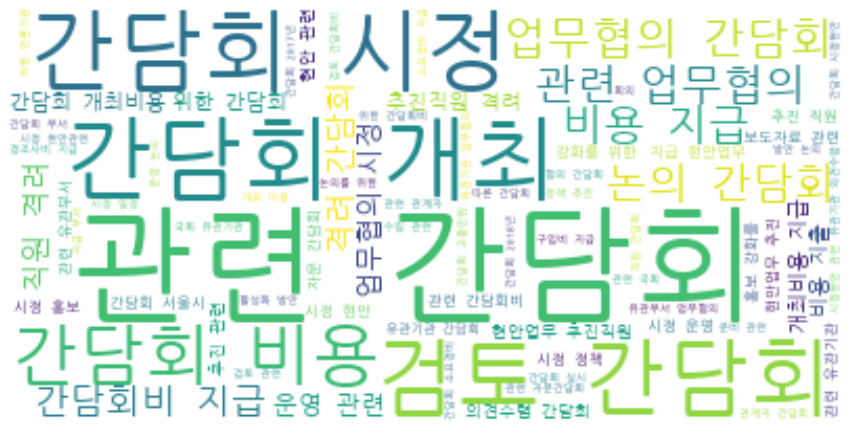

In [10]:
wordcloud = WordCloud(
    background_color='white',
    font_path='C:\\Windows\\Fonts\\NanumGothicCoding.ttf',
    relative_scaling=0.5,
).generate(data)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

집행장소 워드클라우드

In [11]:
# 집행장소가 누락값이 데이터를 확인한다.
df[df.집행장소.isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,일련번호,집행금액,집행목적,집행일시,집행장소
8958,서울혁신기획관,NaN,NaN,NaN,NaN,해당년월 해당과에 등록된 업무추진비가 없습니다. 2016년 10월 이전의 업무추진비...,NaN,,NaN,NaN
21925,행정2부시장,현금,NaN,행정2부시장,행정2부시장,10,50000.0,용산구도시관리국직원 경조사비 지급,2016-01-09,NaN
21938,행정2부시장,현금,NaN,행정2부시장,행정2부시장,23,50000.0,한강사업본부직원경조사비 지급 지급,2016-01-16,NaN
21946,행정2부시장,현금,NaN,행정2부시장,행정2부시장,31,50000.0,도시재생본부직원경조사비 지급,2016-01-22,NaN
21947,행정2부시장,현금,NaN,행정2부시장,행정2부시장,32,50000.0,강북구기획재정국직원 경조사비 지급,2016-01-23,NaN
21948,행정2부시장,현금,NaN,행정2부시장,행정2부시장,33,50000.0,도시기반시설본부직원 경조사비 지급,2016-01-23,NaN
21976,행정2부시장,현금,NaN,행정2부시장,행정2부시장,14,50000.0,물순환안전국직원경조사비 지급,2016-02-08,NaN
21977,행정2부시장,현금,NaN,행정2부시장,행정2부시장,15,50000.0,중부공원녹지사업소직원경조사비 지급,2016-02-08,NaN
21982,행정2부시장,현금,NaN,행정2부시장,행정2부시장,20,50000.0,상수도사업본부직원경조사비 지급,2016-02-14,NaN
21983,행정2부시장,현금,NaN,행정2부시장,행정2부시장,21,50000.0,노원구도시계획국직원 경조사비 지급,2016-02-14,NaN


In [12]:
# 집행장소 누락값을 공백으로 채워준다.
df.집행장소.fillna('', inplace=True)
df[df.집행장소.isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,일련번호,집행금액,집행목적,집행일시,집행장소


In [13]:
df.head()

,1소속부서,결제방법,구분,대상인원,부서명,일련번호,집행금액,집행목적,집행일시,집행장소
0,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,1,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41,동신참치양재직(서초구 강남대로 213)
1,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,2,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06,서울시청구내식당 ( 중구 세종대로 110)
2,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,3,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13,한뫼촌(종로구 북촌로)
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,4,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09,서울시청구내식당(중구 세종대로 110)
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,5,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10,서울시청구내식당(중구 세종대로 110)


In [14]:
# 집행장소가 '-'인 데이터를 확인한다.
df[df.집행장소 == '-']

,1소속부서,결제방법,구분,대상인원,부서명,일련번호,집행금액,집행목적,집행일시,집행장소
150,서울특별시장,현금,현업-우수부서 격려 등,-,행정국 총무과,54,1000000.0,사망직원 유족 위로금 지급,2018-03-15,-
217,서울특별시장,현금,현업-우수부서 격려 등,시장,총무과,27,1000000.0,사망직원 유족 위로금 지급,2018-05-03,-
218,서울특별시장,현금,현업-우수부서 격려 등,시장,총무과,28,1000000.0,사망직원 유족 위로금 지급,2018-05-25,-
279,서울특별시장,현금,현업-우수부서 격려 등,시장,총무과,36,1000000.0,사망직원 유족 위로금,2018-07-13,-
280,서울특별시장,현금,현업-우수부서 격려 등,시장,총무과,37,1000000.0,사망직원 유족 위로금,2018-07-21,-
...,...,...,...,...,...,...,...,...,...,...
50947,시민건강국,현금,NaN,시민건강국장,시민건강국 보건의료정책과,2,50000.0,소속 상근직원 경조사비 지급,2018-07-31,-
51094,시민건강국,현금,NaN,생활보건과,시민건강국 보건의료정책과,19,50000.0,소속 상근직원 경조사비 지급,2017-04-15,-
51095,시민건강국,현금,NaN,보건의료정책과,시민건강국 보건의료정책과,20,50000.0,소속 상근직원 경조사비 지급,2017-04-16,-
51121,시민건강국,현금,NaN,식품안전과,보건의료정책과,8,50000.0,소속 상근직원 경조사비 지급,2017-06-12,-


In [15]:
# 집행장소 '-'을 공백으로 채워준다.
# df.loc[행, 열]
df.loc[df.집행장소 == '-', '집행장소'] = ''
df[df.집행장소 == '-']

,1소속부서,결제방법,구분,대상인원,부서명,일련번호,집행금액,집행목적,집행일시,집행장소


In [16]:
# 집행장소에 주소는 제거하고 상호명이라는 컬럼을 만들어 집행장소에서 가져온다. 
# => 여는 괄호 앞쪽까지 split해 상호명으로 한다.
print('뼈큰감자탕 (대구 중구 명덕로)'.split('(')[0].strip())
# Pandas의 apply 함수 : '집행장소' 열의 각 행에 대해 작업을 수행합니다.
df['상호명'] = df.집행장소.apply(lambda x: x.split('(')[0].strip())
df.head()

뼈큰감자탕


,1소속부서,결제방법,구분,대상인원,부서명,일련번호,집행금액,집행목적,집행일시,집행장소,상호명
0,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,1,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41,동신참치양재직(서초구 강남대로 213),동신참치양재직
1,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,2,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06,서울시청구내식당 ( 중구 세종대로 110),서울시청구내식당
2,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,3,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13,한뫼촌(종로구 북촌로),한뫼촌
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,4,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09,서울시청구내식당(중구 세종대로 110),서울시청구내식당
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,5,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10,서울시청구내식당(중구 세종대로 110),서울시청구내식당


In [17]:
# 상호명이 공백인 데이터의 집행목적을 확인한다.
a = df.loc[df.상호명 == '', '집행목적'].value_counts()
print(a)

소속 상근직원 경조사비 지급          82
소속직원 경조사비 지급             33
축.부의금 지급                 31
소속직원 경조사비 지출             20
축의금 지급                   19
                         ..
서울시의회 박운기의원 경조사비 지급       1
제설대책상황실 해단식 현업부서 직원격려     1
소속 상임 시의원 경조사비 지급         1
서울브랜드 홍보 관계자 간담회          1
                          1
Name: 집행목적, Length: 444, dtype: int64


In [19]:
# 서울시 공무원 맛집을 찾는 것이 목적이므로,
# 불필요한 데이터(상호명이 공백 또는 '-'인 데이터)를 제거한다.
df_shop = df[(df.상호명 != '') & (df.상호명 != '-')]
df_shop

,1소속부서,결제방법,구분,대상인원,부서명,일련번호,집행금액,집행목적,집행일시,집행장소,상호명
0,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,1,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41,동신참치양재직(서초구 강남대로 213),동신참치양재직
1,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,2,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06,서울시청구내식당 ( 중구 세종대로 110),서울시청구내식당
2,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,3,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13,한뫼촌(종로구 북촌로),한뫼촌
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,4,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09,서울시청구내식당(중구 세종대로 110),서울시청구내식당
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,5,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10,서울시청구내식당(중구 세종대로 110),서울시청구내식당
...,...,...,...,...,...,...,...,...,...,...,...
51451,시민건강국,카드,NaN,보건의료정책 직원 4명,시민건강국 보건의료정책과,39,110000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-29 13:23,올리브네트웍스 (중구 세종대로 16길),올리브네트웍스
51452,시민건강국,카드,NaN,시민건강국장 외 7명,시민건강국 보건의료정책과,40,118000.0,2017년 신년업무보고 계획 논의 간담회비 지급,2016-12-29 21:19,남도한식고운님 (중구 세종대로 82),남도한식고운님
51453,시민건강국,카드,NaN,시민건강국장 외 6명,시민건강국 보건의료정책과,41,174000.0,시민건강국 간부 송년 오찬간담회비 지급,2016-12-30 13:04,춘산에프앤비 (중구 태평로1가 84),춘산에프앤비
51454,시민건강국,카드,NaN,보건의료정책과 직원,시민건강국 보건의료정책과,42,30000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-30 13:13,스타벅스 (중구 을지로 19),스타벅스


In [20]:
shop = df_shop.상호명.value_counts()
shop.head(50)

참숯골           773
우도일식          729
서울시청매점        700
구이구이          647
곰국시집          494
서울시청구내식당      409
동해일식          399
무교소호정         362
동해수산          331
바닷가작은부엌       319
스타벅스          319
라칸티나          309
한가람           308
동원참치          304
더테이블한정식       295
삼우정           278
어미가           276
제일가든          274
파리바게뜨         259
오리마당          259
복성각           256
월향            256
열빈            230
무교동낙지         229
남포면옥          223
（주）바닷가작은부엌    217
포메인           205
서라벌           205
마마스           202
대상자 소속부서      199
금강산           195
오복미역          194
창고43          190
대복            189
낙동강           188
목포세발낙지        180
주식회사　동원브이아    178
산채향           176
영덕회식당         175
여수바다장어        175
원주추어탕         170
닥터로빈          169
왕왕샤브샤브        169
만복림           166
서울시청신매점       164
서울삼계탕         164
강가            158
라그릴리아         150
충무집           149
이나니와요스케       144
Name: 상호명, dtype: int64

In [21]:
# 같은 상호명을 하나로 통일한다.
df_shop.loc[df_shop.상호명 == '（주）바닷가작은부엌', '상호명'] = '바닷가작은부엌'
df_shop.loc[df_shop.상호명 == '㈜바닷가작은부엌', '상호명'] = '바닷가작은부엌'
df_shop.loc[df_shop.상호명 == '바닷가작은부엌덕수궁점', '상호명'] = '바닷가작은부엌'

df_shop.loc[df_shop.상호명 == '（주）뚜리삼', '상호명'] = '뚜리삼'
df_shop.loc[df_shop.상호명 == '㈜뚜리삼', '상호명'] = '뚜리삼'

In [32]:
top_1000 = df_shop.상호명.value_counts().head(100)

# 상위 1000개를 데이터프레임으로 만든다.
top_1000 = pd.DataFrame(top_1000).reset_index()
top_1000.columns = ['상호명', '횟수']
top_1000

,상호명,횟수
0,참숯골,773
1,우도일식,729
2,서울시청매점,700
3,구이구이,647
4,바닷가작은부엌,610
...,...,...
95,프레스클럽,84
96,부민옥,84
97,고려삼계탕,83
98,이북만두,83


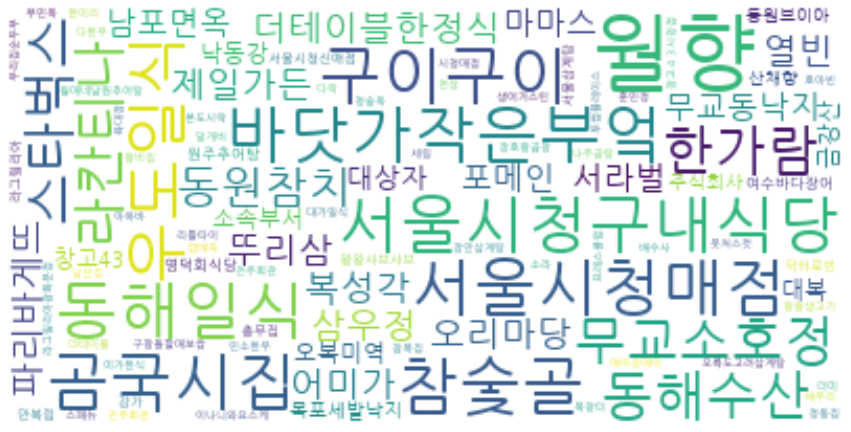

In [35]:
wordcloud = WordCloud(
    background_color='white',
    font_path='C:\\Windows\\Fonts\\NanumGothicCoding.ttf',
    relative_scaling=0.5,
    max_font_size=40,
    max_words=100
).generate(' '.join(top_1000.상호명))
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()